## 💡 마음챙김 (우울증 측정 프로그램)
---
### ☑️ 소개
    이 프로젝트는 10대부터 30대까지의 다양한 우울증 관련 데이터를 기반으로, 사용자의 개인별 특성을 분석하여 맞춤형 우울증 예측 모델을 제공합니다. 인공지능(AI) 기술을 활용해, 각 사용자의 생애 주기와 심리적 특성에 적합한 예측을 수행하며, 이를 통해 보다 정교한 우울증 위험도 평가와 예방 조치를 제시할 수 있습니다. 본 모델은 사용자에게 실시간으로 우울증 가능성을 예측하고, 보다 나은 정신 건강 관리를 돕기 위한 도구로 활용될 수 있습니다.
---
☑️ 목차
1. [☑️ 실습 환경 구성](#실습-환경-구성)
2. [☑️ 파이썬 라이브러리](#파이썬-라이브러리)
3. [☑️ 각 모델별 점수](#각-모델별-점수)
4. [☑️ 결론](#결론)
---
<a name="실습-환경-구성"></a>
### ☑️ 실습 환경 구성
- **PC** : 🖥️ MackBook Air 2020, M1 Chip
- **MacOS** : 🍎 Sequoia 15.1.1
- **Python3** : 🅰️ 3.9.6
- **Safari** : 🛜 18.1.1
---
<a name="파이썬-라이브러리"></a>
### ☑️ 파이썬 라이브러리
```python
#그래프 라이브러리
import matplotlib.pyplot as plt
# 데이터처리 라이브러리
import pandas as pd
import numpy as np
# 데이터 분배 라이브러리
from sklearn.model_selection import train_test_split, GridSearchCV
# 전처리 라이브러리
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
# 선형모델 라이브러리
from skleran.linear_model import LogisticRegression, SGDClassifier
# 부스팅 라이브러리
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 앙상블모델 라이브러리
from skleran.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# 파이프라인 구축
from sklearn.pipeline import make_pipeline
# 케라스 모델
from tensorflow import keras
# Earlystopping 모델
from keras.callbacks import EarlyStopping
```

---
<a name="각-모델별-점수"></a>
### ☑️ 각 모델별 점수
    딥러닝 : 입력층(10개) -> 은닉층(16개) -> 은닉층(8개) -> 출력층(1개)
    딥러닝 모델 -> 훈련 점수 : 92.1
    딥러닝 모델 -> 테스트 점수 : 90.1
    머신러닝 (AdaboostClassifier) ->: 훈련 점수 : 97.8
    머신러닝 (AdaboostClassifier) ->: 테스트 점수 : 96.0
    
---
<a name="결론"></a>
### ☑️ 결론
    항상 딥러닝 모델이 유리한 것은 아니다.






In [343]:
import pandas as pd
import numpy as np

In [345]:
student_data = pd.read_csv('Depression_Student.csv')
student_columns = ['성별', '나이', '학습 압박도', '공부 만족도', '수면 시간', '식습관', '자살충동(Y/N)', 
                         '공부 시간', '금전적 스트레스', '정신질환 가족력', '우울증']
student_data.columns = student_columns
student_data.head()

,성별,나이,학습 압박도,공부 만족도,수면 시간,식습관,자살충동(Y/N),공부 시간,금전적 스트레스,정신질환 가족력,우울증
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


### ☑️ 다른 방법
```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
numerical_features = ['나이', '학습 압박도', '공부 만족도', '공부 시간', '금전적 스트레스']
categorical_features  = ['성별', '수면 시간', '식습관', '자살충동(Y/N)', '정신질환 가족력', '우울증']
print(student_data.info())
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OrdinalEncoder(), categorical_features)
    ]
)
preprocessed_data = preprocessor.fit_transform(student_data)
```
### ☑️ 문제
    - 공부 시간과 금전적 스트레스는 숫자형 데이터인데, 범주형 데이터로 전처리를 진행하는 오류 발생!


In [347]:
# 그래서 각각의 데이터에 대해서 전처리하기로 했습니다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 남자 : 1 / 여자 : 0
student_data['성별'] = le.fit_transform(student_data['성별'])
# 5~6시간 : 0 / 7~8시간 : 1 / 5시간 이전 : 2 / 8시간 이상 : 3
student_data['수면 시간'] = le.fit_transform(student_data['수면 시간'])
# 보통식 : 0, 건강식 : 1, 비건강식 : 2
student_data['식습관'] = le.fit_transform(student_data['식습관'])
# Yes : 1 / No : 0
student_data['자살충동(Y/N)'] = le.fit_transform(student_data['자살충동(Y/N)'])
# Yes : 1 / No : 0
student_data['정신질환 가족력'] = le.fit_transform(student_data['정신질환 가족력'])
# Yes : 1 / No : 0
student_data['우울증'] = le.fit_transform(student_data['우울증'])
student_data.head()

,성별,나이,학습 압박도,공부 만족도,수면 시간,식습관,자살충동(Y/N),공부 시간,금전적 스트레스,정신질환 가족력,우울증
0,1,28,2.0,4.0,1,1,1,9,2,1,0
1,1,28,4.0,5.0,0,0,1,7,1,1,0
2,1,25,1.0,3.0,0,2,1,10,4,0,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0


In [348]:
# 각 나이에 대한 예측보다는 연령대별 예측이 더 좋을것이라고 생각했습니다.
def estimate(data):
    if data >= 10 and data < 20: # 10대
        return 0
    elif data >= 20 and data < 30: # 20대
        return 1
    elif data >= 30 and data < 40: # 30대
        return 2
    else: # 나머지
        return 3

In [350]:
# 해당 함수를 적용시켜, 각 나이에 맞는 연령대 값을 할당합니다.
student_data['연령대'] = student_data['나이'].apply(estimate)
student_data.head()

,성별,나이,학습 압박도,공부 만족도,수면 시간,식습관,자살충동(Y/N),공부 시간,금전적 스트레스,정신질환 가족력,우울증,연령대
0,1,28,2.0,4.0,1,1,1,9,2,1,0,1
1,1,28,4.0,5.0,0,0,1,7,1,1,0,1
2,1,25,1.0,3.0,0,2,1,10,4,0,1,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0,1
4,0,31,1.0,5.0,3,0,1,4,2,1,0,2


In [358]:
# 성별과, 연령대에 따른 학습 압박도, 공부 만족도, 수면 시간, 공부 시간, 금전적 스트레스의 평균입니다.
# 절대적으로 연령별 갈등을 조작하려는게 아니고 단지 데이터에 대한 해석일 뿐입니다.
student_data.groupby(['성별', '연령대']).mean()[['학습 압박도', '공부 만족도', '수면 시간', '공부 시간', '금전적 스트레스']]

# 성별 : 0->여성 / 1->남성
# 연령대 : 0->10대 / 1->20대 / 2->30대
# 학습 압박도 : [1, 2, 3, 4, 5]로 구성 -> 압박도가 적을수록 낮은값, 많을수록 높은값 -> 각 압박도별 인원수 : [ 99,  88, 125,  92,  98]
# 공부 만족도 : [1, 2, 3, 4, 5]로 구성 -> 만족도가 낮을수록 낮은값, 높을수록 높은값 -> 각 만족도별 인원수 : [ 86, 100, 103, 116,  97]
# 수면 시간 : [5~6시간, 7~8시간, 5시간 이하, 8시간 이상] -> 각 수면 시간별 인원수 : [123, 128, 123, 128]
# 금전적 스트레스 : [1, 2, 3, 4, 5]로 구성 -> 스트레스가 높을수록 높은값, 낮을수록 낮은값 -> 각 스트레스별 인원수 : [110, 102, 100,  94,  96]
# - 데이터가 고르게 분포하고 있는 것을 알 수 있습니다.

# 데이터 분석
# 여성 10대 : 금전적 스트레스는 낮은 편. 공부 시간이 많고 만족도가 높은편. 그리고 학습 압박도가 낮은편.
# 여성 20대 : 금전적 스트레스는 많이 높은 편. 공부 시간이 적고 만족도가 많이 낮은편. 그리고 학습 압박도가 높은편.
# 여성 30대 : 금전적 스트레스는 가장 낮은 편. 공부 시간이 많고 만족도가 괜찮은편. 그리고 학습 압박도가 적당한편.

# 남성 10대 : 금전적 스트레스는 낮은 편. 공부 시간이 적당하고 만족도가 높은편. 그리고 학습 압박도가 매우 높은편.
# 남성 20대 : 금전적 스트레스는 매우 높은 편. 공부 시간이 낮고 만족도가 적당한편. 그리고 학습 압박도가 매우 낮은편.
# 남성 30대 : 금전적 스트레스는 적당한 편. 공부 시간이 많고 만족도가 낮은편. 그리고 학습 압박도가 적당한편.

학습 압박도    공부 만족도     수면 시간     공부 시간  금전적 스트레스
성별 연령대                                                  
0  0    2.791667  3.708333  1.541667  6.708333  2.708333
   1    3.090278  2.881944  1.388889  5.798611  3.208333
   2    2.955224  3.253731  1.597015  7.044776  2.686567
1  0    3.653846  3.192308  1.538462  6.500000  2.461538
   1    2.835443  3.107595  1.556962  6.474684  2.993671
   2    3.072289  2.987952  1.542169  6.686747  2.722892

In [362]:
# 자살 충동을 제일 많이 가진 집단은 어딜까요?
# 남성 20대가 무려 83회나 되는군요!
# 여성 20대도 남성만큼은 아니지만 69회로 여성중에 제일 많군요.
student_data.groupby(['성별', '연령대', '자살충동(Y/N)'])['나이'].count()

# 위에서 예측했던 데이터를 바탕으로 이번 데이터를 비교해보면, 여성 20대는 금전적 스트레스가 높고 만족도도 낮습니다. 심지어 학습 압박도가 높은 편이니, 자살충동을 느낄 수 있죠!
# 그런데, 남성 20대는 금전 스트레스만 높은데, 왜 자살 충동을 가장 많이 느끼는걸까요?
# 아마도 여성은 3가지 특성이 많은 영향을 미치고, 남성은 금전적 스트레스가 많은 영향을 미치는 것 같군요.

성별  연령대  자살충동(Y/N)
0   0    0            17
         1             7
    1    0            75
         1            69
    2    0            28
         1            39
1   0    0            11
         1            15
    1    0            75
         1            83
    2    0            36
         1            47
Name: 나이, dtype: int64

In [363]:
# 우울증을 결과 데이터, 나머지 특성을 훈련데이터로 나누어 먼저 훈련시켜보겠습니다.
train_data = student_data[['성별', '연령대', '학습 압박도', '공부 만족도', '수면 시간', '식습관', '자살충동(Y/N)', 
                         '공부 시간', '금전적 스트레스', '정신질환 가족력']].to_numpy()
target_data = student_data['우울증'].to_numpy()

In [364]:
# 가장 먼저 훈련 데이터와 테스트 데이터를 나눕시다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_data,
                                                                      target_data,
                                                                      test_size=0.2)

In [365]:
# 데이터가 부족하지만, 검증 데이터까지 나누죠.
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                    train_target,
                                                                    test_size=0.2)

In [370]:
# 훈련 데이터가 320개 밖에 없어서 과소적합이 나올 것 같지만 일단 한번 해보죠
print('훈련 데이터 개수 : {}'.format(train_input.shape))
print('검증 데이터 개수 : {}'.format(val_input.shape))
print('테스트 데이터 개수 : {}'.format(test_input.shape))

훈련 데이터 개수 : (320, 10)
검증 데이터 개수 : (81, 10)
테스트 데이터 개수 : (101, 10)


In [371]:
# 가장 먼저, 해당 모델은 우울증이냐, 우울증이 아니냐를 묻는 문제이므로 이진 분류를 사용하면 되겠네요.
# 이진 분류의 대표주자인 로지스틱 회귀를 사용해보죠.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)
print('로지스틱회귀 훈련데이터 점수 : {}'.format(lr.score(train_input, train_target)))
print('로지스틱회귀 검증데이터 점수 : {}'.format(lr.score(val_input, val_target)))
print('로지스틱회귀 테스트데이터 점수 : {}'.format(lr.score(test_input, test_target)))

로지스틱회귀 훈련데이터 점수 : 0.95625
로지스틱회귀 검증데이터 점수 : 0.9753086419753086
로지스틱회귀 테스트데이터 점수 : 0.9405940594059405


In [378]:
# 경사하강법에서 손실을 log_loss로 지정해서 훈련해보죠.
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log_loss')
sgdc.fit(train_input, train_target)
print('경사하강법 훈련데이터 점수 : {}'.format(sgdc.score(train_input, train_target)))
print('경사하강법 검증데이터 점수 : {}'.format(sgdc.score(val_input, val_target)))
print('경사하강법 테스트데이터 점수 : {}'.format(sgdc.score(test_input, test_target)))

경사하강법 훈련데이터 점수 : 0.95
경사하강법 검증데이터 점수 : 0.9629629629629629
경사하강법 테스트데이터 점수 : 0.9405940594059405


In [379]:
# 이번에는 XGBoost를 해보죠.
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=3)
xgbc.fit(train_input, train_target)
print('XGBOOST 훈련데이터 점수 : {}'.format(xgbc.score(train_input, train_target)))
print('XGBOOST 검증데이터 점수 : {}'.format(xgbc.score(val_input, val_target)))
print('XGBOOST 테스트데이터 점수 : {}'.format(xgbc.score(test_input, test_target)))

XGBOOST 훈련데이터 점수 : 1.0
XGBOOST 검증데이터 점수 : 0.8888888888888888
XGBOOST 테스트데이터 점수 : 0.8910891089108911


In [382]:
# Gradient Boosting은 어떨까요?
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()
gdc.fit(train_input, train_target)
print('GRADIENT BOOSTING 훈련데이터 점수 : {}'.format(gdc.score(train_input, train_target)))
print('GRADIENT BOOSTING 검증데이터 점수 : {}'.format(gdc.score(val_input, val_target)))
print('GRADIENT BOOSTING 테스트데이터 점수 : {}'.format(gdc.score(test_input, test_target)))

GRADIENT BOOSTING 훈련데이터 점수 : 1.0
GRADIENT BOOSTING 검증데이터 점수 : 0.8765432098765432
GRADIENT BOOSTING 테스트데이터 점수 : 0.900990099009901


In [383]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(learning_rate=0.9)
abc.fit(train_input, train_target)
print('AdaBoost 훈련데이터 점수 : {}'.format(abc.score(train_input, train_target)))
print('AdaBoost 검증데이터 점수 : {}'.format(abc.score(val_input, val_target)))
print('AdaBoost 테스트데이터 점수 : {}'.format(abc.score(test_input, test_target)))

AdaBoost 훈련데이터 점수 : 0.98125
AdaBoost 검증데이터 점수 : 0.9506172839506173
AdaBoost 테스트데이터 점수 : 0.9504950495049505


/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [384]:
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier()
lgbc.fit(train_input, train_target)
print('Lightgbm 훈련데이터 점수 : {}'.format(lgbc.score(train_input, train_target)))
print('Lightgbm 검증데이터 점수 : {}'.format(lgbc.score(val_input, val_target)))
print('Lightgbm 테스트데이터 점수 : {}'.format(lgbc.score(test_input, test_target)))

[LightGBM] [Info] Number of positive: 155, number of negative: 165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484375 -> initscore=-0.062520
[LightGBM] [Info] Start training from score -0.062520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [401]:
# 머신러닝 모델중에서는 AdaBoost가 가장 좋은 모습을 보이는군요.
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=AdaBoostClassifier(),
                 param_grid={
                     'learning_rate':np.arange(0.1, 1.1, 0.1),
                 })
gs.fit(train_input, train_target)
print(gs.best_params_)

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

{'learning_rate': np.float64(1.0)}


/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [403]:
# 그렇게 만족스러운 점수가 아니군요.
abc = AdaBoostClassifier(learning_rate=1.0)
abc.fit(train_input, train_target)
print('AdaBoost 훈련데이터 점수 : {}'.format(abc.score(train_input, train_target)))
print('AdaBoost 검증데이터 점수 : {}'.format(abc.score(val_input, val_target)))
print('AdaBoost 테스트데이터 점수 : {}'.format(abc.score(test_input, test_target)))

AdaBoost 훈련데이터 점수 : 0.9875
AdaBoost 검증데이터 점수 : 0.9012345679012346
AdaBoost 테스트데이터 점수 : 0.9504950495049505


/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [408]:
# 일단, AdaboostingClassifier에서 어떤 특성을 중요하게 여겼는지 확인해볼까요?
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(AdaBoostClassifier())
pipeline.fit(train_input, train_target)
model = pipeline.named_steps['adaboostclassifier']

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [419]:
# 각 특성별 중요도를 체크해보죠.
# 학습 압박도와 자살충동유무가 가장 높은 중요성을 가진다고 판단했군요.
# 다음은 상위 5개의 중요한 특성을 추출했습니다.
pd.DataFrame(
    data=model.feature_importances_,
    index=['성별', '연령대', '학습 압박도', '공부 만족도', '수면 시간', '식습관', '자살충동(Y/N)', 
                         '공부 시간', '금전적 스트레스', '정신질환 가족력'],
    columns=['특성 중요도']
).sort_values(by=['특성 중요도'], ascending=False).head()

,특성 중요도
학습 압박도,0.18
자살충동(Y/N),0.18
공부 만족도,0.14
공부 시간,0.12
금전적 스트레스,0.12


In [423]:
# 이번에는 딥러닝 모델로 구현해볼까요?
# 제가 가지고 있는 총 특성이 10개죠?

In [456]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [457]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(val_input, val_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=0)

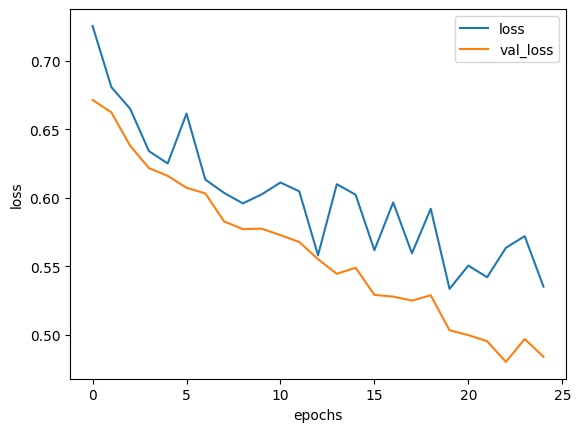

In [458]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [459]:
np.max(history.history['accuracy'])

np.float64(0.7531172037124634)

In [468]:
# 혹시 데이터가 모자라서 그러는게 아닐까요?
train_data = student_data[['성별', '연령대', '학습 압박도', '공부 만족도', '수면 시간', '식습관', '자살충동(Y/N)', 
                         '공부 시간', '금전적 스트레스', '정신질환 가족력']].to_numpy()
target_data = student_data['우울증'].to_numpy()

In [469]:
train_input, test_input, train_target, test_target = train_test_split(train_data,
                                                                      target_data,
                                                                      test_size=0.2)

In [470]:
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [471]:
early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(test_input, test_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=0)

In [472]:
np.max(hisotry.history['accuracy'])

np.float64(0.6882793307304382)

In [473]:
# 흠.. 데이터가 부족한건 아니군요..
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                    train_target,
                                                                    test_size=0.2)

In [477]:
# 모델을 개선해야할 필요가 있겠네요.
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(val_input, val_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4907 - loss: 1.4166 - val_accuracy: 0.5062 - val_loss: 1.1071
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 0.9913 - val_accuracy: 0.4938 - val_loss: 0.9421
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4683 - loss: 0.8612 - val_accuracy: 0.4815 - val_loss: 0.8724
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4509 - loss: 0.8242 - val_accuracy: 0.4444 - val_loss: 0.8256
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4157 - loss: 0.8122 - val_accuracy: 0.4568 - val_loss: 0.7913
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4431 - loss: 0.7678 - val_accuracy: 0.4691 - val_loss: 0.7567
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 0.7291 - val_accuracy: 0.4938 - val_loss: 0.7298
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5237 - loss: 0.6939 - val_accuracy: 0.5185 - v

In [479]:
# Adam 보다는 RMSPROP가 더 좋은 성능을 출력하네요.
# Adagrad는 좀 아닌 것 같네요.
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adagrad(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(val_input, val_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4951 - loss: 0.7108 - val_accuracy: 0.5062 - val_loss: 0.6941
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5337 - loss: 0.6961 - val_accuracy: 0.5062 - val_loss: 0.6914
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 0.6908 - val_accuracy: 0.5062 - val_loss: 0.6894
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4754 - loss: 0.7129 - val_accuracy: 0.5062 - val_loss: 0.6877
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 0.6823 - val_accuracy: 0.5062 - val_loss: 0.6862
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.6875 - val_accuracy: 0.5062 - val_loss: 0.6849
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.6881 - val_accuracy: 0.5062 - val_loss: 0.6837
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5048 - loss: 0.6941 - val_accuracy: 0.5185 - v

In [480]:
# 모델을 개선해야할 필요가 있겠네요.
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(val_input, val_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
 2/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7578 - loss: 0.590771

/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6614 - loss: 0.6404 - val_accuracy: 0.6790 - val_loss: 0.6242
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.6469 - val_accuracy: 0.7037 - val_loss: 0.6195
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.6083 - val_accuracy: 0.6790 - val_loss: 0.6107
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6963 - loss: 0.6047 - val_accuracy: 0.6667 - val_loss: 0.6039
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7166 - loss: 0.5832 - val_accuracy: 0.6790 - val_loss: 0.5955
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - loss: 0.5875 - val_accuracy: 0.7037 - val_loss: 0.5894
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 0.5626 - val_accuracy: 0.7160 - val_loss: 0.5820
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5588 - val_accuracy: 0.7531 - val_loss: 0.5

In [483]:
# 지금까지 옵티마이저를 바꾼 결과 RMSPROP가 가장 적절하다는 것을 알았는데, 혹시 점수가 몇점인가요?
# 모델을 개선해야할 필요가 있겠네요.
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(10,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)
hisotry = model.fit(train_input,
                    train_target,
                    validation_data=(val_input, val_target),
                    epochs=100,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4586 - loss: 1.0703 - val_accuracy: 0.4074 - val_loss: 0.8488
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5051 - loss: 0.7809 - val_accuracy: 0.4815 - val_loss: 0.7243
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5539 - loss: 0.6836 - val_accuracy: 0.5556 - val_loss: 0.6780
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 0.6646 - val_accuracy: 0.6296 - val_loss: 0.6539
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6309 - loss: 0.6201 - val_accuracy: 0.6173 - val_loss: 0.6318
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.6225 - val_accuracy: 0.6296 - val_loss: 0.6133
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.5890 - val_accuracy: 0.6790 - val_loss: 0.5940
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - loss: 0.5751 - val_accuracy: 0.7037 - v

In [484]:
# 딥러닝을 사용하는 것 보다, 머신러닝의 모델을 사용하는 것이 점수가 더 좋다는 것을 알 수 있습니다.

In [485]:
model.save('RMSPROP.h5')

In [486]:
abc.fit(train_input, train_target)
print('Adaboost 훈련점수 : {}'.format(abc.score(train_input, train_target)))
print('Adaboost 검증점수 : {}'.format(abc.score(val_input, val_target)))
print('Adaboost 테스트점수 : {}'.format(abc.score(test_input, test_target)))

Adaboost 훈련점수 : 0.978125
Adaboost 검증점수 : 0.9382716049382716
Adaboost 테스트점수 : 0.9603960396039604


/Users/hack/Develop/Git/real_virtual/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
